# Bridgescaler Introduction

This is a short notebook covering some of the features and use cases of bridgescaler. The main repoistory can be found [here](https://github.com/NCAR/bridgescaler).

Bridgescaler is desigend to add some functionality to scikit-learn pre-processors. 

#### Install

In [1]:
# uncomment the below line if you need to install 2
# !pip install bridgescaler

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bridgescaler import save_scaler, load_scaler
from bridgescaler.group import GroupStandardScaler
from sklearn.preprocessing import QuantileTransformer

## Numpy Example

In [3]:
# Define mean and standard deviation
mean = 500  # This is approximately the midpoint of 10 and 1000
std_dev = 300  # This value is chosen to spread values roughly within the desired range

# Generate the array
gaussian_array = np.random.normal(mean, std_dev, 10000)

Remaining array shape: (8000,)
Random samples shape: (2000,)


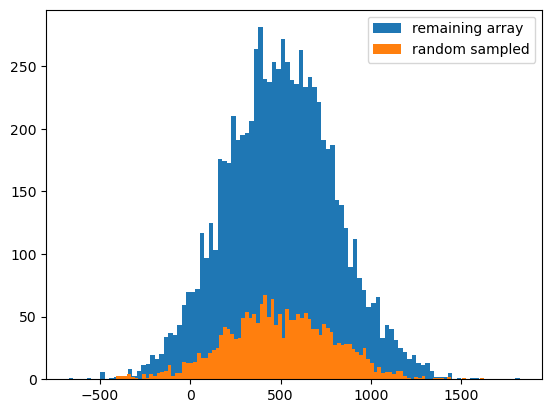

In [4]:
# Randomly choose 2000 indices
indices_to_remove = np.random.choice(gaussian_array.size, 2000, replace=False)

# Get the samples corresponding to the chosen indices
random_samples = gaussian_array[indices_to_remove]

# Remove the selected samples from the original array
remaining_arr = np.delete(gaussian_array, indices_to_remove)

plt.hist(remaining_arr, bins=100, label='remaining array')
plt.hist(random_samples, bins=100, label='random sampled')
plt.legend()

print("Remaining array shape:", remaining_arr.shape)
print("Random samples shape:", random_samples.shape)

#### Let's scale it!

In [5]:
scaler = QuantileTransformer(n_quantiles = 74)

In [6]:
arr_transformed = scaler.fit_transform(remaining_arr.reshape(-1, 1))

In [7]:
filename = "quantile_scaler.json"

In [8]:
# save to json file
save_scaler(scaler, filename)
# create new StandardScaler from json file information.
new_scaler = load_scaler(filename)
# new_scaler is a StandardScaler object

Let's load those parameters, and fit on the subsampled dataset from above:

In [9]:
random_transformed = new_scaler.fit_transform(random_samples.reshape(-1,1))

We can also inverse transform to get close to the original array. The number of quantiles will have a large impact on this.

In [10]:
inverted_random = new_scaler.inverse_transform(random_transformed)
inverted_random

array([[386.35688039],
       [586.64628448],
       [155.9777724 ],
       ...,
       [296.04124775],
       [ 50.26756938],
       [457.81957258]])

Let's see how far apart the medians are:

In [11]:
median_random = np.median(random_transformed)
median_arr = np.median(arr_transformed)
percentage_difference = np.round(np.abs(median_random - median_arr) / median_random * 100, 4)
percentage_difference

0.3066

## Pandas Example

This is using a [Group Scaler](https://bridgescaler.readthedocs.io/en/latest/group.html). 

In [12]:
x_rand = np.random.random(size=(1000, 5))
data = pd.DataFrame(data=x_rand,
                    columns=["a", "b", "c", "d", "e"])
data.describe()

,a,b,c,d,e
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.493160,0.508249,0.482308,0.500310,0.490955
std,0.287404,0.290955,0.283399,0.286028,0.289448
min,0.000282,0.000466,0.000220,0.001726,0.002557
25%,0.239252,0.254053,0.234961,0.260231,0.238156
50%,0.489762,0.528342,0.479333,0.498497,0.489239
75%,0.747075,0.764794,0.714280,0.757906,0.743647
max,0.999566,0.998453,0.999272,0.997966,0.999053


In [13]:
groups = [["a", "b"], ["c", "d"], "e"]
group_scaler = GroupStandardScaler()
x_transformed = group_scaler.fit_transform(data, groups=groups)

We can save out this file like the above:

In [14]:
# save to json file
save_scaler(group_scaler, 'group_scaler.json')